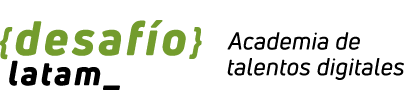

# <center><font color = 'green'>Guía - Modelos de ensamble (parte II)

## AdaBoost

Comenzaremos por cargar las librerías necesarias, y los datos que utilizaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
y = pd.Series(data=cancer.target, index=X.index)

X.sample(7)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
397,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.12060,0.1722,0.2310,0.11290,0.2778,0.07012
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.13230,0.1040,0.1521,0.10990,0.2572,0.07097
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,10.67,36.92,68.03,349.9,0.11100,0.1109,0.0719,0.04866,0.2321,0.07211
224,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.12760,0.1311,0.1786,0.09678,0.2506,0.07623
36,14.250,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.14460,0.4238,0.5186,0.14470,0.3591,0.10140
530,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.13490,0.1854,0.1366,0.10100,0.2478,0.07757


In [3]:
print(X.shape)
X.describe()
X.info

(569, 30)


<bound method DataFrame.info of     mean radius mean texture mean perimeter mean area mean smoothness  \
0         17.99        10.38         122.80    1001.0         0.11840   
1         20.57        17.77         132.90    1326.0         0.08474   
2         19.69        21.25         130.00    1203.0         0.10960   
3         11.42        20.38          77.58     386.1         0.14250   
4         20.29        14.34         135.10    1297.0         0.10030   
..          ...          ...            ...       ...             ...   
564       21.56        22.39         142.00    1479.0         0.11100   
565       20.13        28.25         131.20    1261.0         0.09780   
566       16.60        28.08         108.30     858.1         0.08455   
567       20.60        29.33         140.10    1265.0         0.11780   
568        7.76        24.54          47.92     181.0         0.05263   

    mean compactness mean concavity mean concave points mean symmetry  \
0            0.277

Dividiremos ahora los datos para entrenamiento y test, y con ello crear el modelo de ensamble AdaBoost con un learner base árbol de decisión de profundidad dos. Luego se entrena con los datos de entrenamiento y es sometido a predicción con el segmento de test

In [4]:
# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=23)


In [5]:
# aprendiz débil para el ensamble
learner_base = DecisionTreeClassifier(max_depth=2)

# creamos el modelo de ensamble AdaBoost con 25 iteraciones
aboost_m1 = AdaBoostClassifier(estimator=learner_base, n_estimators=25, learning_rate=.75)

# entrenamos el modelo con los datos de entrenamiento
aboost_m1.fit(X_train, y_train)

# obtener predicciones para el conjunto de test
yhat_test = aboost_m1.predict(X_test)

# se calcula el error
err = 1 - accuracy_score(y_test, yhat_test)
print(err)


C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.05319148936170215


Se muestran ahora los resultados del clasificador en el conjunto de entrenamiento

In [6]:
yhat_train = aboost_m1.predict(X_train)
err = 1 - accuracy_score(y_train, yhat_train)
print(err)

print(classification_report(y_train, yhat_train))


0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       242

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



Se muestran los resultados del clasificador en el conjunto de test

In [7]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        73
           1       0.93      0.98      0.96       115

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



Podemos destacar que en el conjunto de entrenamiento se logran clasificaciones ideales, lo cual hace sospechar de overfitting. Sin embargo, en el segmento de test tenemos un 95% en exactitud y un f1-score promedio ponderado de 95%.

###Impacto en el error por la cantidad de estimadores

Para revisar la incidencia que tiene la cantidad de aprendices débiles en el error aplicado a los datos de train y test, entrenamos 10 AdaBoost con árboles de decisión de profundidad uno, y aplicamos validación cruzada de manera estratificada para mantener las proporciones de las clases, con 5 fold cada vez.


In [8]:
from sklearn.model_selection import StratifiedKFold

k_fold = 5
n_estimator_sim = 10
lst_estimator_sim = np.linspace(5, 75, n_estimator_sim, dtype='int')

learner_base = DecisionTreeClassifier(max_depth=1)
df_err_test = pd.DataFrame({'nest':[], 'ifold':[], 'err':[]})
df_err_train = pd.DataFrame({'nest':[], 'ifold':[], 'err':[]})

skf = StratifiedKFold(n_splits=k_fold, shuffle=True)
for idx, nest in enumerate(lst_estimator_sim):
    for ifold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X.loc[train_idx], X.loc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        aboost_m1 = AdaBoostClassifier(
            estimator=learner_base, n_estimators=nest, learning_rate=.75
        )

        aboost_m1.fit(X_train, y_train)

        yhat_test = aboost_m1.predict(X_test)
        yhat_train = aboost_m1.predict(X_train)

        err_ = 1 - accuracy_score(y_test, yhat_test)
        df_err_test = pd.concat([
            df_err_test, pd.DataFrame({'nest': [nest], 'ifold':[ifold], 'err': [err_]})
        ], axis=0)

        err_ = 1 - accuracy_score(y_train, yhat_train)
        df_err_train = pd.concat([
            df_err_train, pd.DataFrame({'nest': [nest], 'ifold':[ifold], 'err': [err_]})
        ], axis=0)


C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

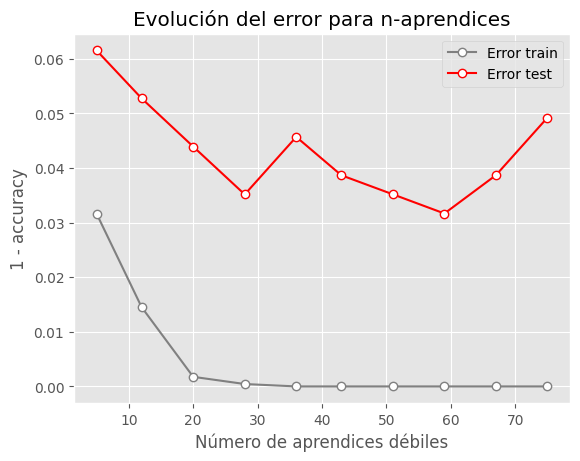

In [9]:
plt.style.use('ggplot')
err_kfold_train = df_err_train.groupby(['nest'])['err'].mean()
err_kfold_test = df_err_test.groupby(['nest'])['err'].mean()

plt.title('Evolución del error para n-aprendices')
plt.plot(err_kfold_train.index, err_kfold_train, '-o', c='gray', mfc='white', label='Error train')
plt.plot(err_kfold_train.index, err_kfold_test, '-o', c='red', mfc='white', label='Error test')
plt.xlabel('Número de aprendices débiles')
plt.ylabel('1 - accuracy')
plt.grid(True)
plt.legend();


El gráfico sugiere que con  28 estimadores es suficiente para obtener un error acotado.

###Impacto en el error para hiper parámetro learning rate

La tasa de aprendizaje, cuando es alta, impacta en la ponderación que tendrán los aprendices débiles afectando especialmente cuando la muestra presenta valores atípicos. Esto se debe a que el ensemble hará crecer rápidamente esa observación lo que puede ocasionar un bajo rendimiento del modelo. Habitualmente se usa learning rate bajo, con el costo de que tengamos que usar más aprendices débiles y esto significa más tiempo para el entrenamiento.

Para encontrar un buen estimador de learning rate para los datos de cáncer de mama que hemos estado revisando, se usa validación cruzada con cinco fold, para una cantidad de estimadores fija igual a nueve.


In [10]:

k_fold = 5
n_lrate = 15
lst_lrate = np.linspace(0.1, 1.0, n_lrate)
nest = 9

learner_base = DecisionTreeClassifier(max_depth=1)
df_err_test = pd.DataFrame({'lr':[], 'ifold':[], 'err':[]})
df_err_train = pd.DataFrame({'lr':[], 'ifold':[], 'err':[]})

skf = StratifiedKFold(n_splits=k_fold, shuffle=True)
for idx, lr in enumerate(lst_lrate):
    for ifold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X.loc[train_idx], X.loc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        aboost_aux = AdaBoostClassifier(
            estimator=learner_base, n_estimators=nest, learning_rate=lr
        )

        aboost_aux.fit(X_train, y_train)

        yhat_test = aboost_aux.predict(X_test)
        yhat_train = aboost_aux.predict(X_train)

        err_ = 1 - accuracy_score(y_test, yhat_test)
        df_err_test = pd.concat([
            df_err_test, pd.DataFrame({'lr': [lr], 'ifold':[ifold], 'err': [err_]})
        ], axis=0)

        err_ = 1 - accuracy_score(y_train, yhat_train)
        df_err_train = pd.concat([
            df_err_train, pd.DataFrame({'lr': [lr], 'ifold':[ifold], 'err': [err_]})
        ], axis=0)


C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\Desafio_latam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

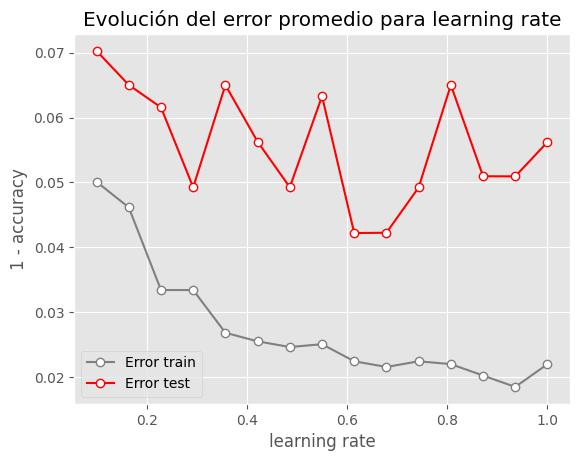

In [11]:
plt.style.use('ggplot')
err_kfold_train = df_err_train.groupby(['lr'])['err'].mean()
err_kfold_test = df_err_test.groupby(['lr'])['err'].mean()

plt.title(r'Evolución del error promedio para learning rate')
plt.plot(err_kfold_train.index, err_kfold_train, '-o', c='gray', mfc='white', label='Error train')
plt.plot(err_kfold_train.index, err_kfold_test, '-o', c='red', mfc='white', label='Error test')
plt.xlabel('learning rate')
plt.ylabel('1 - accuracy')
plt.grid(True)
plt.legend();


En el plot se visualiza como a medida que vamos incrementando learning rate se obtienen errores promedio menores tanto en la muestra de entrenamiento como de test. Observamos además que, con learning_rate = 0.7 logramos un buen ajuste.

##Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# usamos el mismo conjunto de cancer de mama
# y también entrenaremos con los mismos segmentos que
# en adaptive boosting

gboost_m1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=40)
gboost_m1.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=40)

Realizamos predicciones con el modelo entrenado **gboost_m1** para los conjuntos de entrenamiento y test.

In [13]:
# predicción con el modelo previamente entrenado
# para los segmentos de entrenamiento y test

yhat_train = gboost_m1.predict(X_train)
yhat_test = gboost_m1.predict(X_test)

# se calcula el error
err_test = np.round(1 - accuracy_score(y_test, yhat_test), 4)
err_train = np.round(1 - accuracy_score(y_train, yhat_train), 4)

print(f'[Error en train, Error en test]: [{err_train}, {err_test}]')


[Error en train, Error en test]: [0.0307, 0.0442]


Este resultado equivale a un error menor con respecto al error que obtuvimos con Adaptive Boosting para el conjunto de test.

Las métricas de matriz de confusión para los datos de test son:


In [14]:
print('Métricas para datos de test')
print(classification_report(y_test, yhat_test))


Métricas para datos de test
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        71

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



Se aprecia un buen rendimiento de f1-score.

Al revisar estos indicadores en el conjunto de entrenamiento luego de revisar los resultados en el conjunto de test, tenemos un alto rendimiento, como era de esperar.

In [15]:
print('Métricas para datos de train')
print(classification_report(y_train, yhat_train))


Métricas para datos de train
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       170
           1       0.95      1.00      0.98       286

    accuracy                           0.97       456
   macro avg       0.98      0.96      0.97       456
weighted avg       0.97      0.97      0.97       456



Si revisamos los hiper parámetros que usa el modelo de Gradient Boosting en sklearn, nos encontramos que por defecto entrena árboles de regresión con profundidad de 3. Ahora con respecto a la función de pérdida que utiliza este modelo en sklearn,  corresponde a **log_loss** que es la entropía cruzada.

Mostraremos cómo la función de pérdida va disminuyendo a medida que incorporamos más estimadores (árboles de regresión), medida en el conjunto de test.


In [16]:
# Nos movemos en la función de pérdida en cada iteración
# para el conjunto de test
from sklearn.metrics import log_loss

tmp_loss_storage = np.empty(gboost_m1.n_estimators)

for idx, individual_estimate in enumerate(gboost_m1.staged_decision_function(X_test)):
    tmp_loss_storage[idx] = log_loss(y_test, individual_estimate)


Visualizamos ahora la curva de la función de pérdida para distinta cantidad de estimadores.

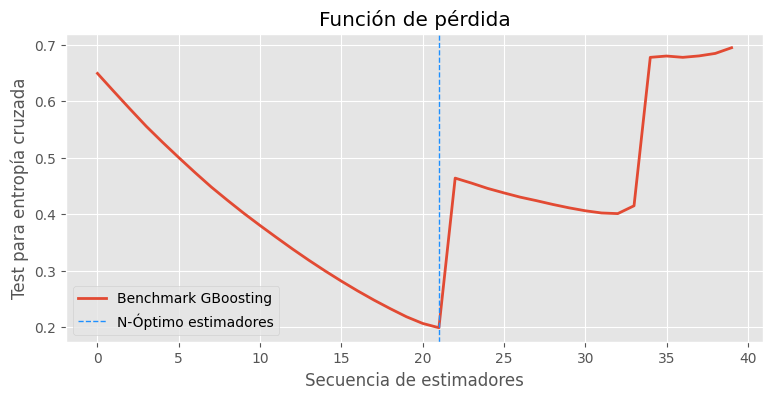

In [17]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(tmp_loss_storage, label='Benchmark GBoosting', lw=2)
ax.axvline(x=np.argmin(tmp_loss_storage), lw=1, ls='--', color='dodgerblue', label='N-Óptimo estimadores')
ax.legend()
ax.set_title('Función de pérdida')
ax.set_xlabel('Secuencia de estimadores')
ax.set_ylabel('Test para entropía cruzada');



A medida que se incorporan más estimadores, la función de pérdida muestra una clara tendencia a ir disminuyendo. Esto no será así siempre. ya que habrá un punto en que crezca e incluso puede ir moviéndose creciendo y disminuyendo, lo que dependerá principalmente de la tasa de aprendizaje.


###Hiper parámetros en Gradient Boosting

Los principales hiper parámetros son:
*  Aquellos relacionados al aprendiz débil, que en este caso sklearn usa árboles de regresión.
*  Hiper parámetros asociados al funcionamiento del ensamble. Acá tenemos la tasa de aprendizaje y la proporción de observaciones a seleccionar para cada aprendiz débil
*  Aquellos relacionados a la parte funcional como la función de pérdida a emplear


###Tasa de aprendizaje

Este hiper parámetro regula cómo será el paso cada vez que nos movemos en la función de pérdida, por lo cual valores altos podrían converger rápido a un valor bajo en la función. Sin embargo, también puede provocar que estando cerca del mínimo no pueda alcanzarlo nunca. Por otro lado, una tasa de aprendizaje peqeño tendrá un entrenamiento lento pero podrá alcanzar un mínimo.

Entrenamos Gradient Boosting para 150 estimadores con tasas de aprendizaje que van de 0.01 a 1.5, para las cuales se calcula su función de pérdida para cada estimador.


In [18]:
lst_lr = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5]
tmp_loss_storage_lr = []

for i, lr in enumerate(lst_lr):
    gboost_m1_aux = GradientBoostingClassifier(random_state=23, learning_rate=lr, n_estimators=150)
    gboost_m1_aux.fit(X_train, y_train)

    tmp_loss_storage = np.empty(gboost_m1_aux.n_estimators)

    for idx, individual_estimate in enumerate(gboost_m1_aux.staged_decision_function(X_test)):
        tmp_loss_storage[idx] = log_loss(y_test, individual_estimate)

    tmp_loss_storage_lr.append(tmp_loss_storage)


Se grafican los resultados, en los que se observa que cuando la tasa es baja la función de pérdida llega a los mínimos de manera más lenta, y cuando la tasa es alta ocurre que a veces no llega a los mínimos y su descenso es más rápido. Además, se produce un aumento en la pérdida (en este ejemplo, para la tasa de aprendizaje 1.5). En consecuencia, es importante poder sintonizar este valor para lograr un buen rendimiento en el modelo.


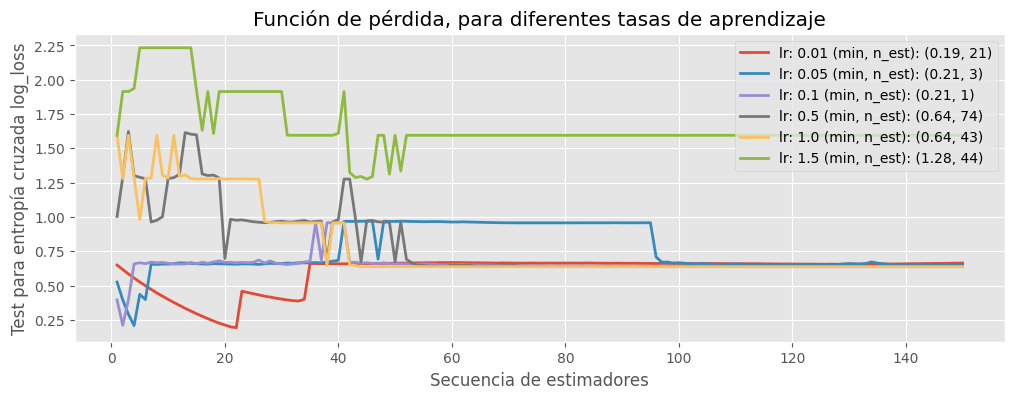

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.set_title('Función de pérdida, para diferentes tasas de aprendizaje')
ax.set_xlabel('Secuencia de estimadores')
ax.set_ylabel('Test para entropía cruzada log_loss');

for i, loss_storage in enumerate(tmp_loss_storage_lr):
    lr = lst_lr[i]

    mmin = np.round(np.min(loss_storage), 2)
    n_est = np.argmin(loss_storage)
    ax.plot(range(1, len(loss_storage)+1),loss_storage, label=f'lr: {lr} (min, n_est): ({mmin}, {n_est})', lw=2)

ax.legend();


####Subsample

Este hiper parámetro controla la proporción de observaciones que se escogen aleatoriamente en cada árbol de regresión en la secuencia, mientras más pequeño sea este, se logra disminuir la varianza del modelo y con esto elevar el nivel de generalización.


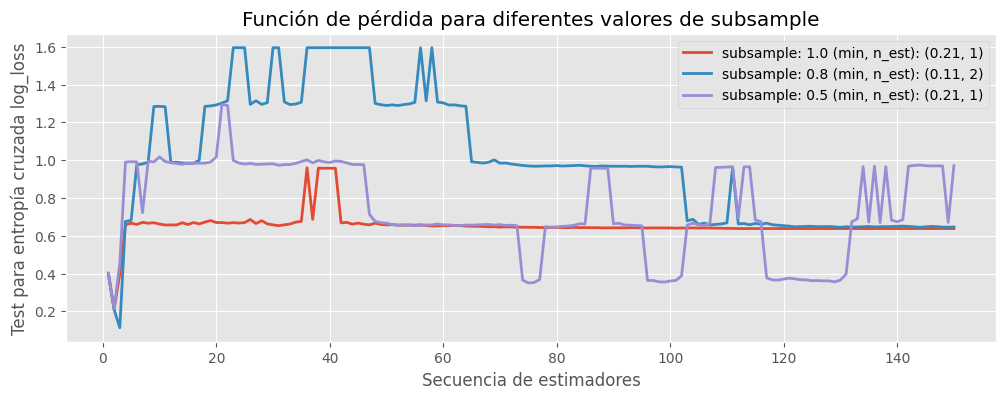

In [20]:
'''
Esto no estaba en el documento, hice lo que me pareció (usando Chat GPT)

'''

lst_subsample = [1.0, 0.8, 0.5]  # Diferentes valores de subsample
tmp_loss_storage_subsample = []

for i, subsample in enumerate(lst_subsample):
    gboost_m1_aux = GradientBoostingClassifier(random_state=23, subsample=subsample, n_estimators=150)
    gboost_m1_aux.fit(X_train, y_train)

    tmp_loss_storage = np.empty(gboost_m1_aux.n_estimators)

    for idx, individual_estimate in enumerate(gboost_m1_aux.staged_decision_function(X_test)):
        tmp_loss_storage[idx] = log_loss(y_test, individual_estimate)

    tmp_loss_storage_subsample.append(tmp_loss_storage)

fig, ax = plt.subplots(figsize=(12, 4))

ax.set_title('Función de pérdida para diferentes valores de subsample')
ax.set_xlabel('Secuencia de estimadores')
ax.set_ylabel('Test para entropía cruzada log_loss')

for i, loss_storage in enumerate(tmp_loss_storage_subsample):
    subsample = lst_subsample[i]

    mmin = np.round(np.min(loss_storage), 2)
    n_est = np.argmin(loss_storage)
    ax.plot(range(1, len(loss_storage) + 1), loss_storage, label=f'subsample: {subsample} (min, n_est): ({mmin}, {n_est})', lw=2)

ax.legend()

En el gráfico vemos que usando subsample = 100% se logra el menor valor para la función de pérdida, este valor es el usado por defecto en sklearn.

Ahora debemos considerar cual es la mejor combinación de hiper parámetros que nos lleve al mejor ajuste, para ello usaremos búsqueda por grilla con los siguientes valores:

<center><strong>n_estimators: </strong> 20, 50, 80, 120</center>
<center><strong>learning_rate: </strong> 0.01, 0.05, 0.1, 0.5, 1.0, 3.0</center>
<center><strong>subsample: </strong> 2np.linspace(0.05, 1, 5)</center>

Se entrena el modelo en búsqueda de los hiper parámetros óptimos, usando cinco fold para validación cruzada.

In [21]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20, 50, 80, 120],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 3.0],
    'subsample': np.linspace(0.05, 1, 5)
}

gboost_m1_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
gboost_m1_grid.fit(X_train, y_train)


CPU times: total: 2.69 s
Wall time: 2min 1s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 3.0],
                         'n_estimators': [20, 50, 80, 120],
                         'subsample': array([0.05  , 0.2875, 0.525 , 0.7625, 1.    ])})

In [22]:
print('Mejores hiper parámetros encontrados')
print(gboost_m1_grid.best_params_)
print()
print('Mejor score alcanzado:')
print(gboost_m1_grid.best_score_)


Mejores hiper parámetros encontrados
{'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 0.7625}

Mejor score alcanzado:
0.9606067845198281


Entrenamos un modelo usando los hiper parámetros óptimos encontrados anteriormente:

In [23]:
yhat = gboost_m1_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        71

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



Podemos observar que se logra un muy alto rendimiento para el conjunto de test.

Más abajo se muestra este rendimiento en la curva ROC junto con el rendimiento en el segmento de entrenamiento.

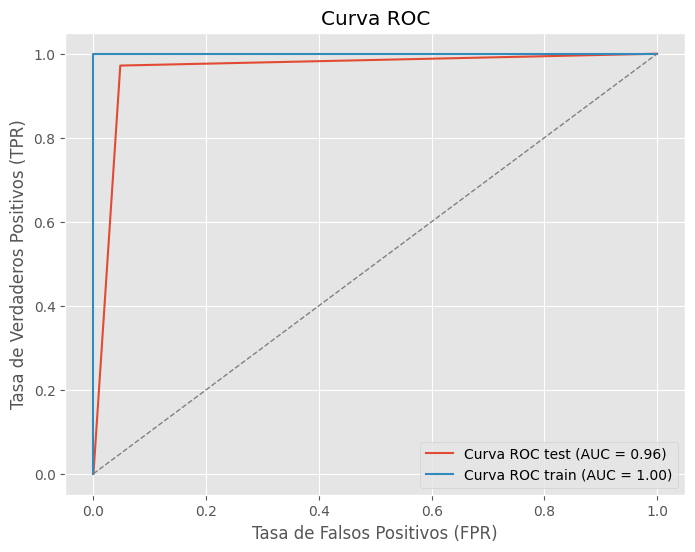

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

yhat_test_proba = gboost_m1_grid.best_estimator_.predict(X_test)
yhat_train_proba = gboost_m1_grid.best_estimator_.predict(X_train)

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr_test, tpr_test, umbrales_test = roc_curve(y_test, yhat_test_proba)
fpr_train, tpr_train, umbrales_train = roc_curve(y_train, yhat_train_proba)

# Calcular el área bajo la curva ROC (AUC)
auc_test = roc_auc_score(y_test, yhat_test_proba)
auc_train = roc_auc_score(y_train, yhat_train_proba)

# Plot de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, lw=1.5, label='Curva ROC test (AUC = {:.2f})'.format(auc_test))
plt.plot(fpr_train, tpr_train, lw=1.5, label='Curva ROC train (AUC = {:.2f})'.format(auc_train))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show();


## XGboost

La creación del modelo, su entrenamiento y predicción siguen la misma estructura que en sklearn. Será necesario antes instalar esta biblioteca.

In [25]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [26]:
%%time
import xgboost as xgb

param_grid = {
    'n_estimators': [20, 50, 80, 120],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 3.0],
    'subsample': np.linspace(0.05, 1, 5)
}

xgboost_m1_grid = GridSearchCV(xgb.XGBClassifier(random_state=23, max_depth=4), param_grid=param_grid, cv=5, n_jobs=-1)
xgboost_m1_grid.fit(X_train, y_train)


CPU times: total: 2.44 s
Wall time: 35.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 3.0],
                         'n_estimators': [20, 50, 80, 120],
                         'subsample': array([0.05  , 0.2875, 0.525 , 0.7625, 1.    ])})

In [27]:
print('Mejores hiper parámetros encontrados')
print(xgboost_m1_grid.best_params_)
print()
print('Mejor score alcanzado:')
print(xgboost_m1_grid.best_score_)


Mejores hiper parámetros encontrados
{'learning_rate': 0.1, 'n_estimators': 120, 'subsample': 0.2875}

Mejor score alcanzado:
0.9715002388915434


Las métricas para la matriz de confusión son:

In [28]:
yhat = xgboost_m1_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        71

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



Con XGBoost se logra una pequeña mejora en la predicción del conjunto de entrenamiento en Gradient Boosting era de 0.98 y en XGBoost 0.99.